# Wine review Analysis

##  Import libraries

In [1]:
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Polygon
import seaborn as sns
sns.set(style="ticks")
from scipy import stats

## Loading dataset

In [2]:
df = pd.read_csv('winemag-data_first150k.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [4]:
#Checking for duplicates
sum(df.duplicated())

0

In [5]:
#checking amount of null values
def null_val(dataset):
    columns = list(dataset)
    for col in columns: 
        if sum(dataset[col].isnull()) != 0:
            print(col, sum(dataset[col].isnull()))

null_val(df)

country 5
designation 45735
price 13695
province 5
region_1 25060
region_2 89977


In [6]:
#checking data type of all columns
def get_class(dataset):
    columns = list(dataset)
    for column in columns:
        dtype = type(dataset[column][0])
        print(column, dtype)
    
get_class(df)

#no changes needed

Unnamed: 0 <class 'numpy.int64'>
country <class 'str'>
description <class 'str'>
designation <class 'str'>
points <class 'numpy.int64'>
price <class 'numpy.float64'>
province <class 'str'>
region_1 <class 'str'>
region_2 <class 'str'>
variety <class 'str'>
winery <class 'str'>


In [7]:
#shape of dataset
print('the dataset has', df.shape[0], 'rows and', df.shape[1], 'columns')

the dataset has 150930 rows and 11 columns


In [8]:
#summary statistic about numeric variables in dataset
df.describe()

#Ratings all between 80 and 100. 
#Prices from 4 to 2300, while 75% of the prices are equal or 
#less to 40, huge variance in the dataset

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [9]:
#Check the country variables
df.country.value_counts()

#Most vines are from the famous wine regions of the world

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [10]:
#Check the variety variables (grape type)
df.variety.value_counts()

#There are many different grape types in the data set

Chardonnay                       14482
Pinot Noir                       14291
Cabernet Sauvignon               12800
Red Blend                        10062
Bordeaux-style Red Blend          7347
Sauvignon Blanc                   6320
Syrah                             5825
Riesling                          5524
Merlot                            5070
Zinfandel                         3799
Sangiovese                        3345
Malbec                            3208
White Blend                       2824
Rosé                              2817
Tempranillo                       2556
Nebbiolo                          2241
Portuguese Red                    2216
Sparkling Blend                   2004
Shiraz                            1970
Corvina, Rondinella, Molinara     1682
Rhône-style Red Blend             1505
Barbera                           1365
Pinot Gris                        1365
Cabernet Franc                    1363
Sangiovese Grosso                 1346
Pinot Grigio             

In [11]:
#Check out designation variable
df.designation.value_counts()

#Here it seems that little bit of research is needed
#Are there Spelling mistakes and titles need to be replaced?

Reserve                                         2752
Reserva                                         1810
Estate                                          1571
Barrel sample                                   1326
Riserva                                          754
Barrel Sample                                    639
Brut                                             624
Crianza                                          503
Estate Grown                                     449
Estate Bottled                                   396
Dry                                              374
Old Vine                                         331
Gran Reserva                                     330
Brut Rosé                                        248
Extra Dry                                        244
Vieilles Vignes                                  225
Bien Nacido Vineyard                             195
Rosé                                             180
Late Bottled Vintage                          

In [12]:
#checkout province variable
df.province.value_counts()

California                                44508
Washington                                 9750
Tuscany                                    7281
Bordeaux                                   6111
Northern Spain                             4892
Mendoza Province                           4742
Oregon                                     4589
Burgundy                                   4308
Piedmont                                   4093
Veneto                                     3962
South Australia                            3004
Sicily & Sardinia                          2545
New York                                   2428
Northeastern Italy                         1982
Loire Valley                               1786
Alsace                                     1680
Marlborough                                1655
Southwest France                           1601
Central Italy                              1530
Southern Italy                             1439
Champagne                               

In [13]:
#checkout province variable
df.winery.value_counts()

Williams Selyem               374
Testarossa                    274
DFJ Vinhos                    258
Chateau Ste. Michelle         225
Columbia Crest                217
Kendall-Jackson               216
Concha y Toro                 216
Trapiche                      205
Bouchard Père & Fils          203
Kenwood                       191
De Loach                      189
Joseph Drouhin                189
Georges Duboeuf               188
Cameron Hughes                172
Wines & Winemakers            169
Albert Bichot                 167
Robert Mondavi                166
Louis Latour                  154
Dry Creek Vineyard            153
D'Arenberg                    153
Morgan                        153
Concannon                     151
Martin Ray                    149
Errazuriz                     148
Gary Farrell                  144
L'Ecole No. 41                144
Olivier Leflaive              143
Montes                        142
Waterbrook                    142
Iron Horse    

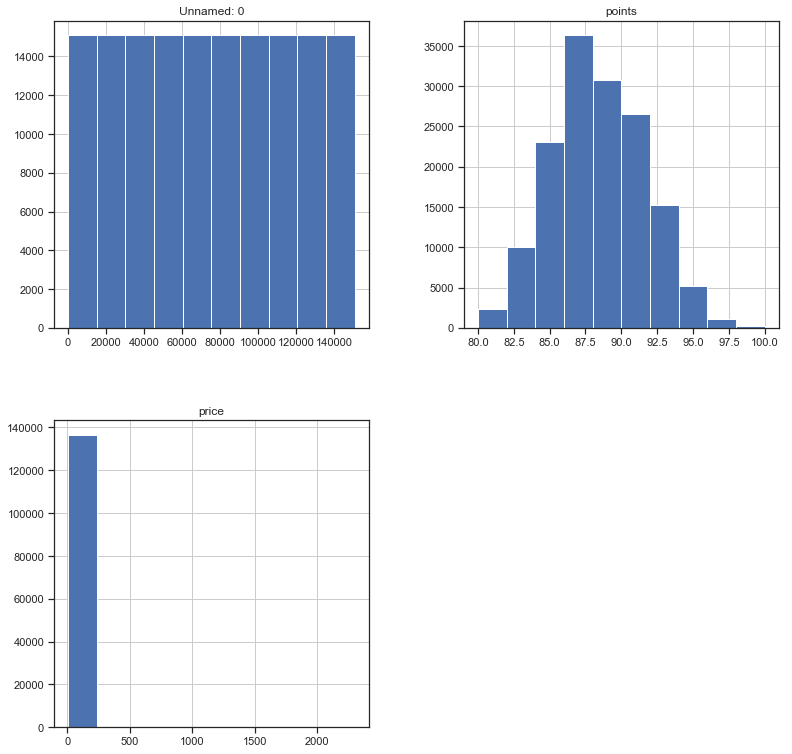

In [14]:
df.hist(figsize=(13,13));

# Assessing Data 

## Quality
- Unnamed: 0 column is not needed
- Designation coumn shows similar entries with different spelling
- Prices from 4 to 2'300, while 75% of the prices are equal or less to 40, huge variance in the dataset
- There are many countries, designations, wineries and provices, which only appear once
- There are 53'079 duplicates in the dataset 
- There are 13'695 rows with null values for price 
- There are 5 rows will null values for province and country
- There are 25'060 null values in region 1 and 89'977 null values in region 2

# Cleaning Data

In [15]:
#droping unwanted column 
df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
# Designation: https://winefolly.com/tutorial/reserve-wine-well-depends/
#despite designation terms sound similar, the differences are not due to language, so they cannot be
#summarized
designation_style = {}
for key, value in zip(df.designation.value_counts().index, df.designation.value_counts()):
    designation_style[key]  = value

designation_names = []
for key, value in designation_style.items():
    designation_names.append(key)

designation_names = pd.DataFrame(designation_names)

designation_names.rename(columns = {0:'Name'}, inplace = True)
designation_names.sort_values(by=['Name'], inplace=True)

designation_names
#since designation variable provides too many confusing descriptions, it will be ignored

,Name
10797,"""M"""
26224,#50 Mon Chou
14254,#SocialSecret
28793,'72
18709,'A Naca Rosso
29380,'A Rina
27498,'Na Vota
24290,'Nearly Naked'
14089,'S'
6413,'l Clumbé


In [17]:
#dropping duplicaets
df.drop_duplicates(inplace=True)
df.shape

(97851, 10)

In [18]:
#checking again for null values after deleting duplicates
null_val(df)

country 3
designation 29896
price 8720
province 3
region_1 15932
region_2 58360


In [19]:
#check columns with 
df[df['country'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [20]:
#Fill out missing information with google

#http://www.tsililis.gr/english/page.aspx?id=1046&cat=3
df.loc[[1133],'country'] = 'Greece'
#http://www.buyulubag.com/eng/
df.loc[[1440],'country'] = 'Turkey'
#http://chilcaswines.com/home/
df.loc[[68226],'country'] = 'Chile'

#all others information can not be recovered 

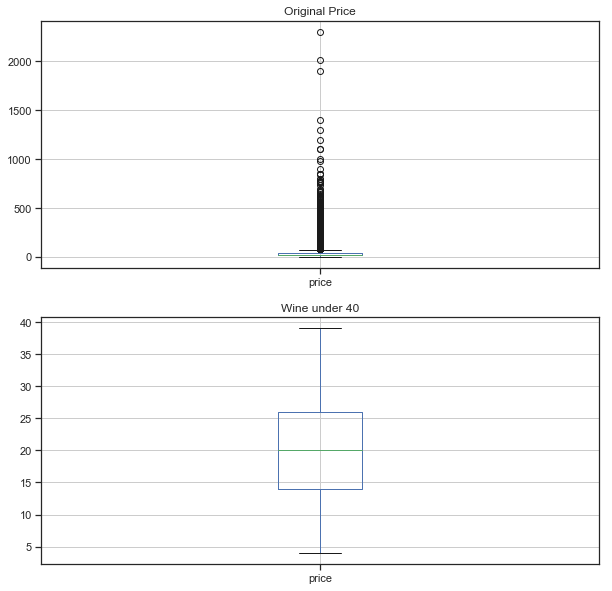

In [21]:
#checking distribution of price variable with boxplot
df_price_40 = df.query('price < 40')

#https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots/14770827
f, axs = plt.subplots(2,2,figsize=(10,10))

#creating 2 plots and plotting first with original df
plt.subplot(2, 1, 1)
df.boxplot(column='price');
plt.title('Original Price')

#2nd plot with wine under 40
plt.subplot(2, 1, 2)
df_price_40.boxplot(column='price');
plt.title('Wine under 40')

#adjust heightspace between the datasets
plt.subplots_adjust(hspace = 0.2)
plt.show()

#since most of the data (75%) show prices below or equal to 40
#a 2nd dataframe df_price_40 was created

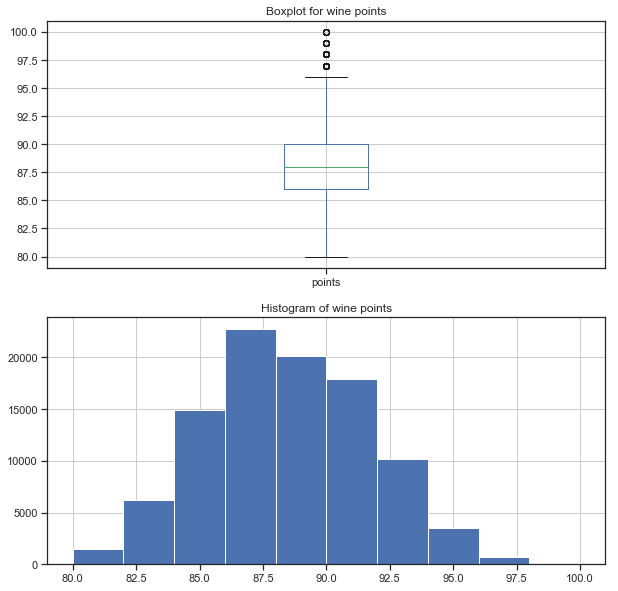

In [22]:
#https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots/14770827
f, axs = plt.subplots(2,2,figsize=(10,10))

#creating 2 plots and plotting first with original df
plt.subplot(2, 1, 1)
df.boxplot(column='points');
plt.title('Boxplot for wine points')

#2nd plot with wine under 40
plt.subplot(2, 1, 2)
df['points'].hist();
plt.title('Histogram of wine points')

#adjust heightspace between the datasets
plt.subplots_adjust(hspace = 0.2)
plt.show()



# Data Analysis

## Questions to answer:

- Which are the 5 most popular countries in the data set?
- Which are the 5 most popular designations in the data set?
- Which are the 5 most popular regions in the data set?
- Which are the 5 most popular varieties in the data set?
- Which are the 5 most pupular wineries in the data set?
- Which countries and regions produce the best wine in average?
- Which regions provide the best quality / price ratio in average?

##  Section
- Which are the 5 most popular countries in the data set?
- Which are the 5 most popular designations in the data set?
- Which are the 5 most popular regions in the data set?
- Which are the 5 most popular varieties in the data set?
- Which are the 5 most pupular wineries in the data set?


In [23]:
#creating get_top_5_value_counts that takes a dataframe and col as input
#It creates a dictionary "full_dic" with all the entries of a value_counts() function
#Then it creates a DataFrame based on the dictionary and renames it columns
#After the top 5 entries are only stored in a dataframe 
def get_top_5_value_counts(dataframe, col):
    full_dic = {}
    for index, value in zip(dataframe[col].value_counts().index, dataframe[col].value_counts()):
        full_dic[index] = value
    df_full_dic = pd.DataFrame.from_dict(full_dic, orient='index', columns=['count'])
    df_full_dic = df_full_dic.reset_index()
    df_full_dic = df_full_dic.rename(columns={'index' : col})
    df_full_dic_top5 = df_full_dic.iloc[:5,:]
    return df_full_dic_top5   

#same as previous function just providing a plot in the end
def get_top_5_value_counts_chart(dataframe, col):
    full_dic = {}
    for index, value in zip(dataframe[col].value_counts().index, dataframe[col].value_counts()):
        full_dic[index] = value
    df_full_dic = pd.DataFrame.from_dict(full_dic, orient='index', columns=['count'])
    df_full_dic = df_full_dic.reset_index()
    df_full_dic = df_full_dic.rename(columns={'index' : col})
    df_full_dic_top5 = df_full_dic.iloc[:5,:]
    chart = plt.bar(df_full_dic_top5[col], df_full_dic_top5['count'], color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xticks(rotation=65)
    plt.ylabel('Count')
    if col[-1] == 'y':
        col = col[:-1]+'ies'
    elif col[-2] == '_':
        col = col[:-2]+'s'
    else:
        col = col+'s'    
    plt.title('Top 5 most frequent ' + col.title() + ' within Dataset')
    return plt.show()

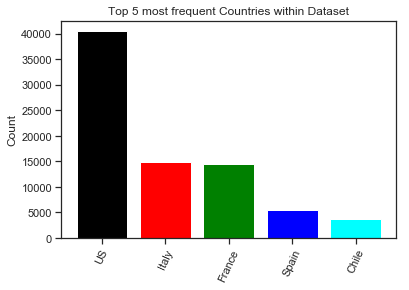

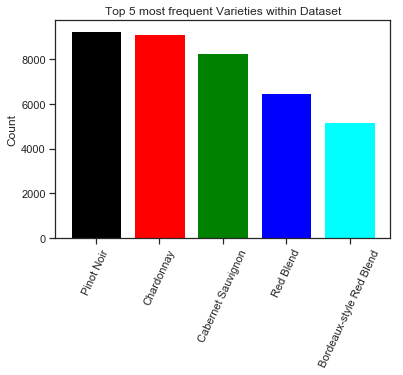

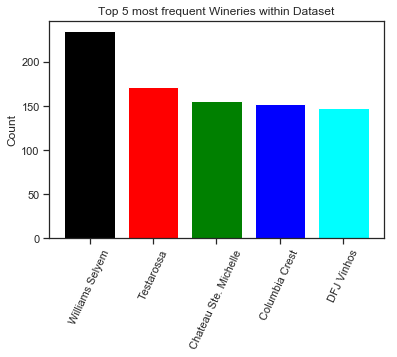

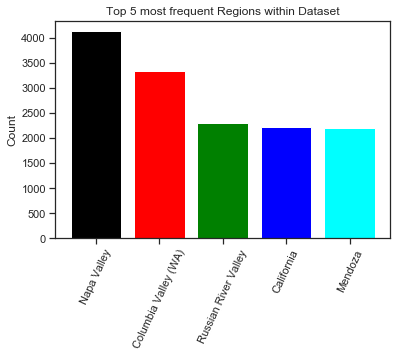

In [24]:
#Analysis of top 5 values among the string columns
fig1, ax1 = plt.subplots()
get_top_5_value_counts_chart(df, 'country');

fig2, ax2 = plt.subplots()
get_top_5_value_counts_chart(df, 'variety');

fig3, ax3 = plt.subplots()
get_top_5_value_counts_chart(df, 'winery');

fig4, ax4 = plt.subplots()
get_top_5_value_counts_chart(df, 'region_1');

plt.show()

In [25]:
popular_winaries = ['Williams Selyem', 'Testarossa', 'Chateau Ste. Michelle', 'Columbia Crest', 'DFJ Vinhos']

for winery in popular_winaries:
    a = df.query('winery == @winery')
    print(winery, ":", a.iloc[0,0])

print('-----------')    
popular_regions = ['Napa Valley', 'Columbia Valley (WA)', 'Russian River Valley', 'California', 'Mendoza']

for region in popular_regions:
    b = df.query('region_1 == @region')
    print(region, ":", b.iloc[0,0])


Williams Selyem : US
Testarossa : US
Chateau Ste. Michelle : US
Columbia Crest : US
DFJ Vinhos : Portugal
-----------
Napa Valley : US
Columbia Valley (WA) : US
Russian River Valley : US
California : US
Mendoza : Argentina


# Observations in first plot


The anlysis show that the most frequent wine samples by far, with more than 40'000 counts, are from the United States. Italy and France follow this values with almost 15'000 samples each. Spain and Chile are also among the top 5 represented countries in the data set. 

The 2nd bar chart indicates the most popular varieties in the data set are Pinot Noir, Chardonnay, Cabarnet Sauvignon, Red Blend and Bordeaux-style Red Blend, while Pinot Noir, Chardonnay and Cabarnet Sauvignon share almost the same popularity. 

The most frequent appearing wineries are Williams-Selyem, Testarossa, Chateau Ste. Michelle, Columbia Crest and DFJ Vinhos. Interestingly Williams-Selyem, Testarossa, Chateau Ste. Michelle and Columbia Crest are located in the United Sates, despite having french origin names. Only DFJ Vinhos among the top 5 most frequent wineries is located in Portgual. 

The most frequent appearing regions are Napa Valley, Columbia Valley (WA), Russian River Valley, California,  and Mendoza. The first 4 are all located in the United States, while only Mendoza is located outstide the U.S., namely in Argentina. Napa Valley provides more than 4000 wines, while Columbia Valley (WA) a bit more than 3000 wines. All other regions provide less than 2500 wines. 


**The findings indicate for a need to create a data set without the United States**

In [26]:
#Create a DataFrame without the US
df_not_us = df.query('country !="US"')

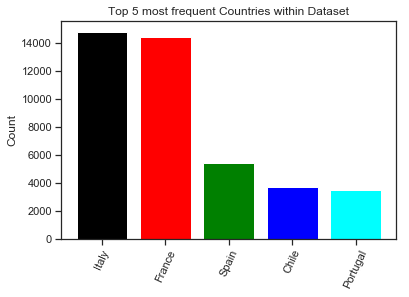

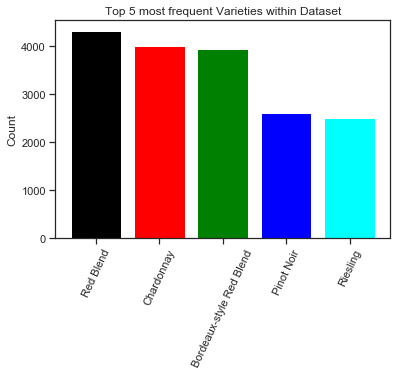

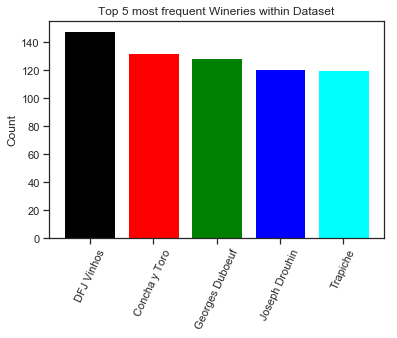

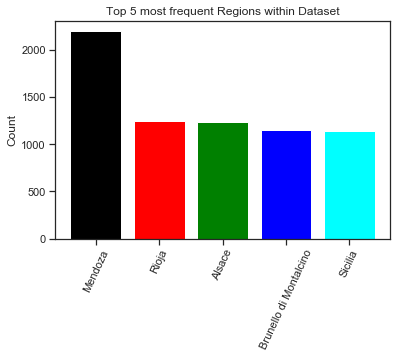

In [27]:
#Analysis of top 5 values among the string columns
fig1, ax1 = plt.subplots()
get_top_5_value_counts_chart(df_not_us, 'country');

fig2, ax2 = plt.subplots()
get_top_5_value_counts_chart(df_not_us, 'variety');

fig3, ax3 = plt.subplots()
get_top_5_value_counts_chart(df_not_us, 'winery');

fig4, ax4 = plt.subplots()
get_top_5_value_counts_chart(df_not_us, 'region_1');

plt.show()

In [28]:
popular_winaries_notus = ['DFJ Vinhos', 'Concha y Toro', 'Georges Duboeuf', 'Joseph Drouhin', 'Trapiche' ]

for winery in popular_winaries_notus:
    a = df.query('winery == @winery')
    print(winery, ":", a.iloc[0,0])

print('-----------')    
popular_regions_notus = ['Mendoza', 'Rioja', 'Alsace', 'Brunello di Montalcino', 'Sicilia']

for region in popular_regions_notus:
    b = df.query('region_1 == @region')
    print(region, ":", b.iloc[0,0])



DFJ Vinhos : Portugal
Concha y Toro : Chile
Georges Duboeuf : France
Joseph Drouhin : France
Trapiche : Argentina
-----------
Mendoza : Argentina
Rioja : Spain
Alsace : France
Brunello di Montalcino : Italy
Sicilia : Italy


# Observation of same plots without the us


By excluding the US from the anlysis, the data show that the most frequent wine sample are from the same 4 as priviously, except Portugal was added to the list of top 5 countries outside the us. Portugal provides almost different 4'000 wines. The dataset shwos that outside the United States, Europe is a major hub for producing wine. 

The 2nd bar chart indicates the most popular varieties in the data set are Red Blend, Chardonnay, Bordeaux-style Red Blend, Pinot Noir and Riesling. The chart indicates that different varietes are among the most popular ones by excluding the United Stats. While Red Blen, Chardonnay, Bordeaux-style and Pinot Noir remained in the list, Cabarnet Sauvignon dropped out of the list. Even more surprising, Chardonnay was not the most popular variety among the remaining ones, and also otherwise the order of popularity changed. New to the list Riesling was added with more than 2000 samples.

The most frequent appearing wineries outside the U.S. are DFJ Vinhos (Portugal), Concha y Toro (Chile), Georges Duboeuf (France), Joseph Drouhin (France) and Trapiche (Argentina). All of the wineries contributed 120-140 different wines to the data set. 

Interestingly the regions don't follow the same trend as the top wineries. The top region in the dataset, outside the United States, was Mendoza (Argentina), followed by Rioja (Spain), Alsace (France), Brunello di Montalcino (Italy) and Sicilia (Italy). Thereby, Mendoza was by far the most popular region with more than 2000 samples from the region, followed by Roja with approx. 1200 samples. 


##  Section

- Which countries and regions produce the best wine in average?
- Which countries and regions produce the most expensive wine in average?
- Which regions provide the best quality / price ratio in average?

In [29]:
#creates a function that creates a subset of the data frame, depending on value counts of a column
#inputs: dataframe, desired column and the minimum amount of values needed to be added to dataframe
#outputs: new dataframe based on column and minimum value counts
def create_df_value_counts(dataframe, col, amount_of_min_value_counts):
    dic = {}
    for index, value in zip(dataframe[col].value_counts().index, dataframe[col].value_counts()):
        dic[index] = value
    dic_amount = []
    for key, value in dic.items():
        if value >= amount_of_min_value_counts:
            dic_amount.append(key)
    new_df = df[df[col].isin(dic_amount)]
    return new_df

In [30]:
#create df with countries with more than 100 wines 
df_country_100 = create_df_value_counts(df,'country',100)

#create df with wineries with more than 10 wines 
df_winery_10 = create_df_value_counts(df,'winery',10)

In [31]:
#- Which countries produce the best wine in average?
#creates a function that creates a groupedby calculation of a column and applies a statistic
#to a selected value (row), sorting these values and slicing the dataframe, then it returns a chart
#inputs: dataframe, desired column to groupby, desired value to apply calculation, 
#sort ascending or not (True or False), slice by the amount of datapoints desired and apply a 
#statistics to the columns
#outputs: bar chart based on the applied statistcs
def get_best_wine_grouped (dataframe, groupedby, value, sort, amount, stat):
    #calculating statistics based on groupby
    if stat == 'mean':
        grouped = dataframe.groupby(groupedby)[value].mean().reset_index()
        grouped = grouped.sort_values(value, ascending=sort)
        grouped_amount = grouped.iloc[:amount,:]
    elif stat == 'median':
        grouped = dataframe.groupby(groupedby)[value].median().reset_index()
        grouped = grouped.sort_values(value, ascending=sort)
        grouped_amount = grouped.iloc[:amount,:]
    elif stat == 'sum':
        grouped = dataframe.groupby(groupedby)[value].sum().reset_index()
        grouped = grouped.sort_values(value, ascending=sort)
        grouped_amount = grouped.iloc[:amount,:]
        
    #adding country behind a region
    if groupedby == 'region_1':
        popular_regions = list(grouped_amount[groupedby])
        region_countries = []
        for region in popular_regions:
            region_countries.append(dataframe[dataframe[groupedby] == region].iloc[0,0])
        for i in range(len(grouped_amount[groupedby])):
            grouped_amount.iloc[i, 0] = grouped_amount.iloc[i, 0] + ' ' +'(' + region_countries[i] +')'

    #adding country behind a winery
    if groupedby == 'winery':
        popular_winery = list(grouped_amount[groupedby])
        winery_countries = []
        for winery in popular_winery:
            winery_countries.append(dataframe[dataframe[groupedby] == winery].iloc[0,0])
        for i in range(len(grouped_amount[groupedby])):
            grouped_amount.iloc[i, 0] = grouped_amount.iloc[i, 0] + ' ' +'(' + winery_countries[i] +')'

            
    
    #plotting the chart        
    chart = plt.bar(grouped_amount[groupedby], grouped_amount[value], color='black')
    plt.xticks(rotation=65)
    plt.ylabel(value)
    return chart;


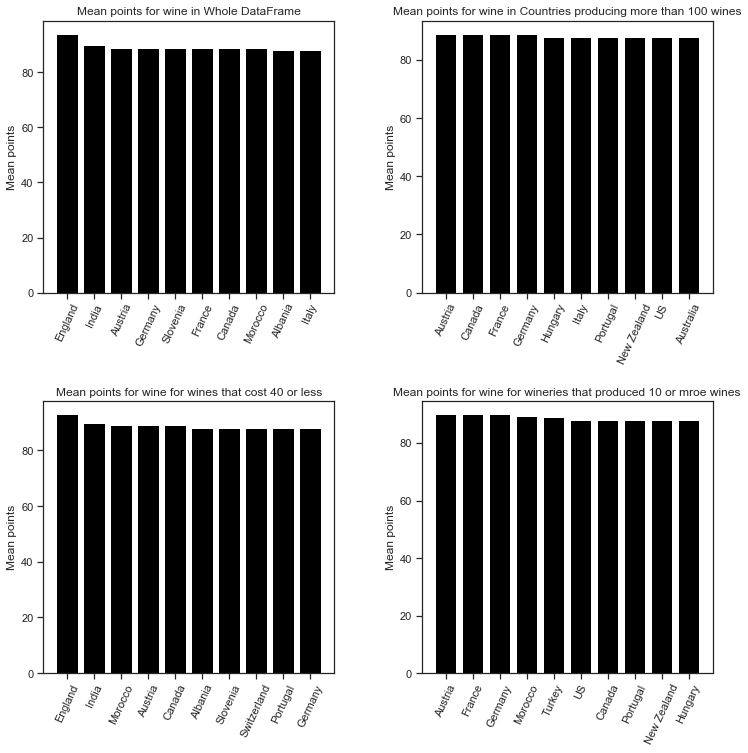

In [32]:
#https://matplotlib.org/tutorials/introductory/pyplot.html
    
plt.figure(1, figsize=(12,12))

plt.subplot(221)
get_best_wine_grouped(df,'country','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine in Whole DataFrame')
plt.subplot(222)
get_best_wine_grouped(df_country_100,'country','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine in Countries producing more than 100 wines')
plt.subplot(223)
get_best_wine_grouped(df_price_40,'country','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine for wines that cost 40 or less')
plt.subplot(224)
get_best_wine_grouped(df_winery_10,'country','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine for wineries that produced 10 or mroe wines')

plt.subplots_adjust(hspace = 0.4, wspace=0.3)
plt.show();

In [33]:
len(df.query('country == "England"'))

9

# Observation of Wine Quality Plots


The data set indicated again very interesting insights. On the one hand side it revealed that the best wines (according to points) are different by subsetting the data. Surprisingly, the full data set indicates that England shows up as country with the highest wine quality.. A country that is rather know for football, fish and chips or else, not necessarily for good wine. By subsetting, different top 10 consetllations. One has to consider that it only contributed with 9 samples to the dataset. 

By analyzing only countries with larger amount of wine samples (100 wines in countries or 10 produced wines by wineries), Austria France and Germany are among the countries with the best wine quality. 

By focusing only on cheaper wine (price under 40, what refers to 75% of the data set), the analysis show that England, India and Marocco are the most popular countries. 

Overall the differences in wine quality tend to be rather small among the analyzed countries. 


**Next**

- Which regions produce the best wine in average?


/Users/Nunu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


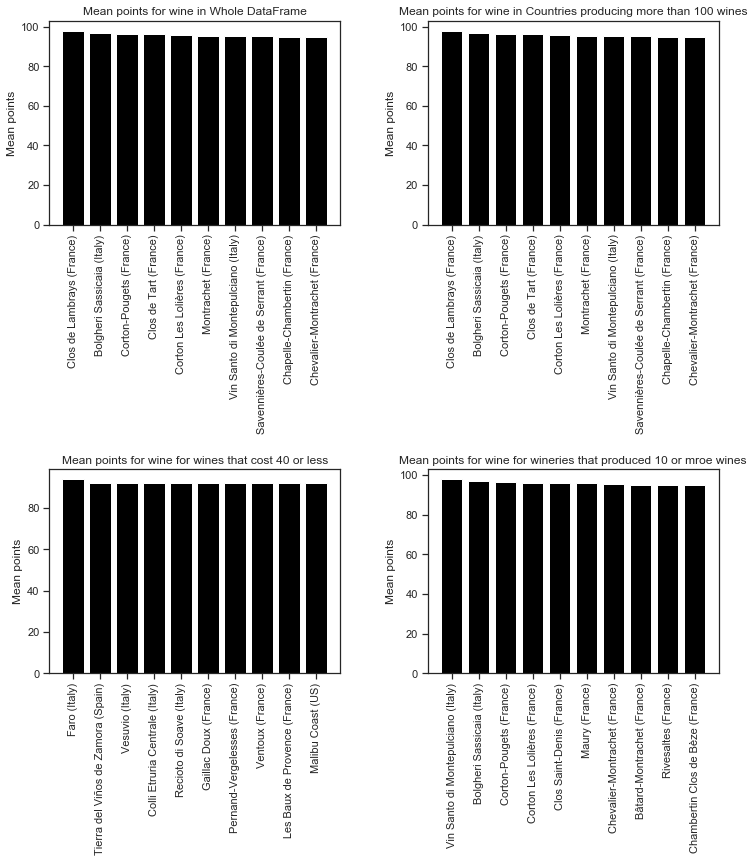

In [34]:
#https://matplotlib.org/tutorials/introductory/pyplot.html
    
plt.figure(1, figsize=(12,12))

plt.subplot(221)
get_best_wine_grouped(df,'region_1','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine in Whole DataFrame')
plt.xticks(rotation=90)

plt.subplot(222)
get_best_wine_grouped(df_country_100,'region_1','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine in Countries producing more than 100 wines')
plt.xticks(rotation=90)

plt.subplot(223)
get_best_wine_grouped(df_price_40,'region_1','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine for wines that cost 40 or less')
plt.xticks(rotation=90)

plt.subplot(224)
get_best_wine_grouped(df_winery_10,'region_1','points', False, 10, 'median');
plt.ylabel('Mean points')
plt.title('Mean points for wine for wineries that produced 10 or mroe wines')
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 1.2, wspace=0.3)
plt.show();

# Observation of Wine Quality Plots by Region

Our picture seem to remain constant with different result in different subsets of the data. But what remained contant in the qine quality anlysis by region was the predominant role of wine regions in France and Italy among all subsets. Clos de Lambrays, Bolgheri Sassicaia Clos de Tart and Corton les Loileres seem to be very good wine regions. For lower cost wine (below 40), Faro in Italy, Tierra del Viños de Zoamora in Spain, Vesuvio in Italy, etc. were among the best wine regions.

Similar in all data set was the little difference in quality scores within the subsets. But it seems to show that lower cost wine achieve lower quality scores. 



**Next**

- Which countries produce the most expensive wine in average?

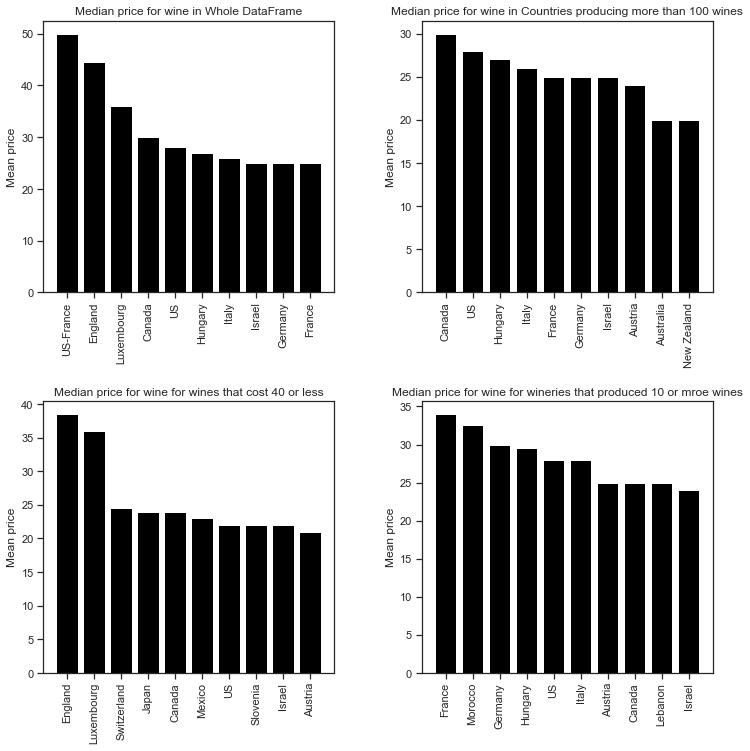

In [35]:
#https://matplotlib.org/tutorials/introductory/pyplot.html
    
plt.figure(1, figsize=(12,12))

plt.subplot(221)
get_best_wine_grouped(df,'country','price', False, 10, 'median');
plt.ylabel('Mean price')
plt.title('Median price for wine in Whole DataFrame')
plt.xticks(rotation=90)

plt.subplot(222)
get_best_wine_grouped(df_country_100,'country','price', False, 10, 'median');
plt.ylabel('Mean price')
plt.title('Median price for wine in Countries producing more than 100 wines')
plt.xticks(rotation=90)

plt.subplot(223)
get_best_wine_grouped(df_price_40,'country','price', False, 10, 'median');
plt.ylabel('Mean price')
plt.title('Median price for wine for wines that cost 40 or less')
plt.xticks(rotation=90)

plt.subplot(224)
get_best_wine_grouped(df_winery_10,'country','price', False, 10, 'median');
plt.ylabel('Mean price')
plt.title('Median price for wine for wineries that produced 10 or mroe wines')
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.4, wspace=0.3)
plt.show();

In [36]:
len(df.query('country == "US-France"')), len(df.query('country == "England"')),
len(df.query('country == "Luxembourg"')),len(df.query('country == "Switzerland"')),
len(df.query('country == "Morocco"')),len(df.query('country == "Hungary"')),

(11, 139)

# Average wine Cost in Countries

The first plot indicate that US-France co-produced wine achieve the highest median price. One needs to consider that only sample can be found within the dataset. Otherwise, many interesting and unexpected countries can be found within the most expensive wine producing countries as England, Luxemburg and Hungary. Median price tend to be between 25 and 45.

Median prices at countries with more than 100 samples tend to be smaller than median prices in the combined data set. This may be explained by the different quality of wine of wine produced in a country with a big wine industry. Canada, US, Hungary (Surprisingly), Italy  and France are among the most leading countries in median wine prices, having prices between 25 and 30.

In the cheaper wine segment England leads the rice in front of Luxembourg and Switzerland. One has to consider that only very few samples are within the analyzed dataframe (England:9, Luxembourg: 3, Switzerland: 4). This weakens the strength of the overall story of the plot. 

By subseting the data with wineries that produce more than 10 wines, France Marocco, Germany and Hungary are among the most expensive wines. Whereas France and Germany are among the expected ones, Morocco and Hungary made it into the top 4 list with median prices of 29 or 33. 

**Next**

- Which regions produce the most expensive wine in average?

/Users/Nunu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


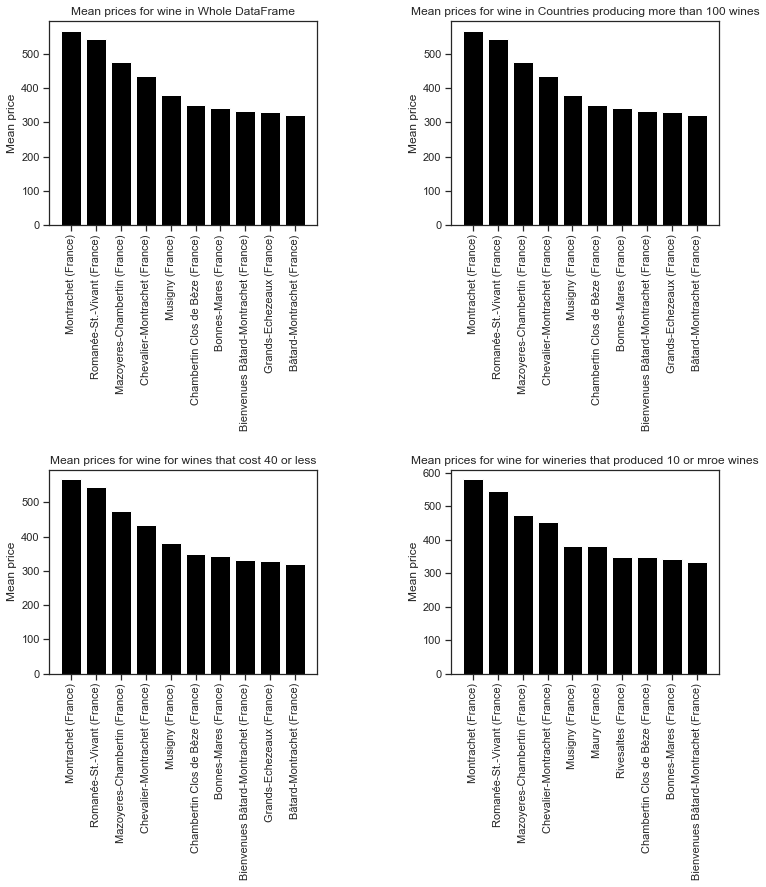

In [37]:
#https://matplotlib.org/tutorials/introductory/pyplot.html

plt.figure(1, figsize=(12,12))

plt.subplot(221)
get_best_wine_grouped(df,'region_1','price', False, 10, 'mean');
plt.ylabel('Mean price')
plt.title('Mean prices for wine in Whole DataFrame')
plt.xticks(rotation=90)
plt.subplot(222)
get_best_wine_grouped(df_country_100,'region_1','price', False, 10, 'mean');
plt.ylabel('Mean price')
plt.title('Mean prices for wine in Countries producing more than 100 wines')
plt.xticks(rotation=90)
plt.subplot(223)
get_best_wine_grouped(df,'region_1','price', False, 10, 'mean');
plt.ylabel('Mean price')
plt.title('Mean prices for wine for wines that cost 40 or less')
plt.xticks(rotation=90)
plt.subplot(224)
get_best_wine_grouped(df_winery_10,'region_1','price', False, 10, 'mean');
plt.title('Mean prices for wine for wineries that produced 10 or mroe wines')
plt.ylabel('Mean price')
plt.xticks(rotation=90)


plt.subplots_adjust(hspace = 1.2, wspace= 0.5)

plt.show();

# Multivariate Plots

In [38]:
#Creating variable Price levels according to
#quantile(0.25,.5,.75,.9,1)
bin_edges = [4,16,25,40,60,2300]

bin_names = ['very low' ,'low' ,'medium' ,'high', 'very high' ] 
df['price_level'] = pd.cut(df['price'], bin_edges, labels=bin_names)

#Creating variable quality_levels according to
#quantile(0.25,.5,.75,.9,1)
bin_edges_points = [80,86,88,90,92,100]

bin_names_points = ['very low' ,'low' ,'medium' ,'high', 'very high' ] 
df['quality_level'] = pd.cut(df['points'], bin_edges_points, labels=bin_names_points)



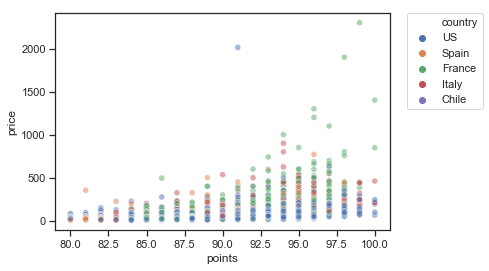

In [39]:
sns.scatterplot(x="points", y="price", hue="country", alpha=0.5,
                  data=df[(df['country'].isin(get_top_5_value_counts(df, 'country')['country']))]);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show();

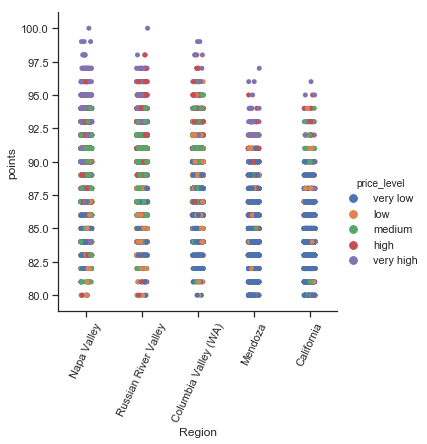

In [40]:
#https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x="region_1", y="points", hue="price_level", 
            data=df[df['region_1'].isin(get_top_5_value_counts(df, 'region_1')['region_1'])]);
plt.xticks(rotation=65)
plt.xlabel('Region')


plt.show();

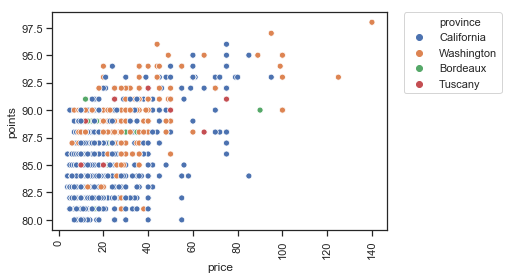

In [41]:
sns.scatterplot(x="price", y="points", hue="province", 
            data=df[df['region_1'].isin(get_top_5_value_counts(df, 'province')['province'])])
plt.xticks(rotation=90);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

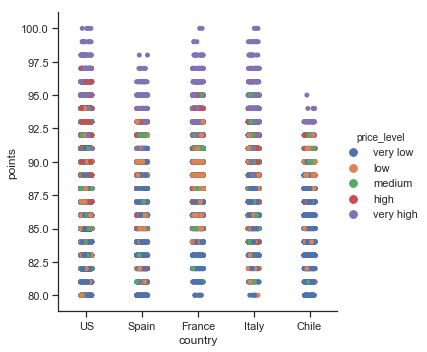

In [42]:
#https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x="country", y="points", hue="price_level", jitter=True, 
            data=df[df['country'].isin(get_top_5_value_counts(df, 'country')['country'])]);

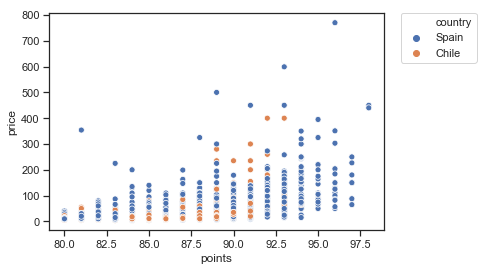

In [43]:
sns.scatterplot(x="points", y="price", hue='country', alpha=1, x_jitter=.5,
                  data=df[(df['country'] == 'Spain') | (df['country'] == 'Chile')]);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

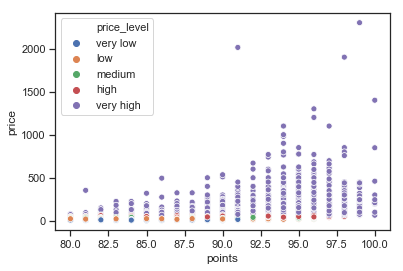

In [44]:
sns.scatterplot(x="points", y="price", hue='price_level',
                data = df);